<a href="https://colab.research.google.com/github/rayrishiraj/CodeClause/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERFORMED BY: RISHIRAJ RAY**

PROBLEM: CREDIT CARD FRAUD DETECTION

PROCEDURE TO PERFORM THE OPERATION
1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA CONTENT

4. EXPLORATORY DATA ANALYSIS

6. DATA PREPROCESSING

7. MODEL TRAINING AND EVALUATING

8. CONCLUSION

In [4]:
import os
os.environ ['KAGGLE_CONFIG_DIR'] ='/content/drive/MyDrive/Kaggle'

In [5]:
%cd '/content/drive/MyDrive/Kaggle'

/content/drive/MyDrive/Kaggle


In [6]:
#importing dataset directly from kaggle into the drive
! kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 123MB/s]
100% 66.0M/66.0M [00:00<00:00, 112MB/s]


In [9]:
#unzipping
!unzip \*.zip && rm *.creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
#importing liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Kaggle/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#briefing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

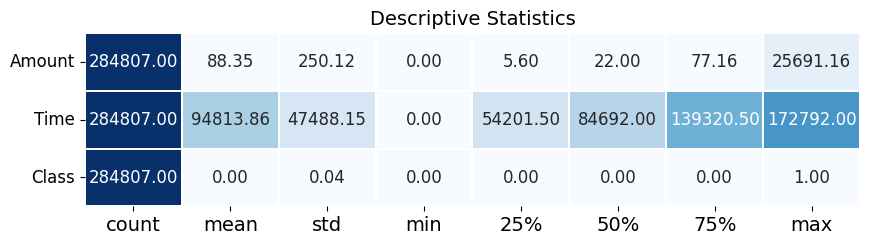

In [112]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [7]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [8]:
# check for class imbalance
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now as we can see the dataset is highly unbalanced we have to apply Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [12]:
legit_sample = legit.sample(n=492)

In [14]:
#Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133994,80599.0,-2.121548,-2.975837,0.023305,-2.156221,3.255661,2.330288,-1.718040,0.528748,-2.150771,...,-0.424452,-0.166907,0.592895,1.013617,0.125278,-0.132060,-0.025927,-0.001992,10.00,0
124920,77472.0,-0.409969,1.099708,1.403853,0.088508,0.066022,-0.693317,0.659083,0.034218,-0.447511,...,-0.211741,-0.501036,0.057039,0.353363,-0.270479,0.080752,0.263056,0.098674,4.99,0
162669,115285.0,1.995309,0.126891,-1.699777,0.453885,0.165330,-1.196250,0.122806,-0.193164,0.417663,...,0.246551,0.824032,-0.010974,-0.072268,0.174489,-0.118973,-0.006160,-0.039840,5.00,0
185212,126570.0,2.018677,-0.463978,-1.956182,0.029721,0.387193,-0.249178,0.020252,-0.044359,0.580652,...,0.339492,0.961430,-0.176335,0.157838,0.334600,0.996984,-0.125036,-0.085769,46.81,0
142585,84808.0,0.455422,-0.902683,0.954504,3.001481,-0.929290,0.566473,-0.040230,0.096543,0.180280,...,-0.007327,-0.600706,-0.295836,0.048047,0.244567,-0.107747,-0.023548,0.092672,357.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [91]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [92]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93492.662602,-0.057944,-0.042593,0.077115,0.088657,0.059262,-0.001941,-0.034160,0.022680,0.012280,...,0.013941,-0.048791,-0.039200,-0.006489,0.019227,-0.025445,0.009571,-0.018045,0.005282,81.571016
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [93]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [96]:
#importing the libraries
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [111]:
#trainning on multiple models and predicting
highest_accuracy_test = 0.8
model = [LGBMClassifier(),KNeighborsClassifier(),XGBClassifier(),DecisionTreeClassifier(), RandomForestClassifier(),
         GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression(), SVC()]
for i in model:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(i,'Accuracy on Test data : ', acc)
    print(i,"Classification_report: \n",classification_report(y_test, y_pred))
    if (acc > highest_accuracy_test):
      highest_accuracy_test = acc
      acc = acc.round(2)
      j = i
    print(" ")
print(" ")
print(j,'has the highest Accuracy in test data: ', highest_accuracy_test)

[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMClassifier() Accuracy on Test data :  0.9187817258883249


**Conclusion:**

1. I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.
2. We then investigated ten predictive models. The data was split in 2 parts, a train set and a test set.
3. I have evaluated the performance of the models using the Classification report and other metrics. The best results were obtained with XGBoost with accuracy of 0.92.